In [1]:
from xcube_cmems.store import CmemsDataStore
from dotenv import load_dotenv
import os

### set cmems username and password to be environment variables

In [2]:
dataset_id = "dataset-bal-analysis-forecast-wav-hourly"
load_dotenv()
cmems_user = os.getenv("CMEMS_USER")
cmems_user_password = os.getenv("CMEMS_PASSWORD")
cmems_params = {'cmems_user': cmems_user,
                'cmems_user_password': cmems_user_password,
                }

In [3]:
cmems_store =  CmemsDataStore(**cmems_params)

### Get all opendap dataset ids for CMEMS API

In [4]:
list(cmems_store.get_data_ids())

['cmems_obs-si_ant_physic_my_drift-amsr_P2D',
 'cmems_obs-si_ant_physic_my_drift-amsr_P3D',
 'BAS-ANT-SEAICE_TYPE-L4-NRT-OBS',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1M',
 'cmems_obs-oc_arc_bgc-plankton_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-plankton_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-reflectance_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-reflectance_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-transp_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-transp_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-optics_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-reflectance_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-transp_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-optics_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-plankton_nrt_l4-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-plankton_nrt_l4-olci-300m_P1M',
 'cmems_obs-oc_arc_bgc-transp_nrt_l4-olci-300m_P1

In [5]:
cmems_store.get_data_opener_ids()

('dataset:zarr:cmems',)

In [6]:
data_des = cmems_store.describe_data('dataset-bal-analysis-forecast-wav-hourly')

In [7]:
data_des.time_range

('2018-12-01', '2022-10-02')

In [8]:
data_des.bbox

(9, 53, 30.221627251342774, 65.91610912890626)

### Open a dataset without cube params

In [9]:
ds = cmems_store.open_data('dataset-bal-analysis-forecast-wav-hourly','dataset:zarr:cmems')
ds

<xarray.Dataset>
Dimensions:    (time: 33624, lat: 775, lon: 764)
Coordinates:
  * lat        (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon        (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time       (time) datetime64[ns] 2018-12-01T01:00:00 ... 2022-10-02
Data variables: (12/17)
    VHM0       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_SW1   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_SW2   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_WW    (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VMDR       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VMDR_SW1   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    ...         ...
    VTM01_SW1  (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM01_SW2  (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM01_WW   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM02      (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM10      (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTPK       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

In [10]:
ds.VHM0

<xarray.DataArray 'VHM0' (time: 33624, lat: 775, lon: 764)>
dask.array<open_dataset-f0691f63d75ad478fa09b1e07b08d296VHM0, shape=(33624, 775, 764), dtype=float32, chunksize=(4, 481, 474), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time     (time) datetime64[ns] 2018-12-01T01:00:00 ... 2022-10-02
Attributes:
    long_name:      Spectral significant wave height (Hm0)
    standard_name:  sea_surface_wave_significant_height
    units:          m
    valid_min:      0.0
    valid_max:      20.0

In [11]:
ds.VTPK

<xarray.DataArray 'VTPK' (time: 33624, lat: 775, lon: 764)>
dask.array<open_dataset-f0691f63d75ad478fa09b1e07b08d296VTPK, shape=(33624, 775, 764), dtype=float32, chunksize=(4, 481, 474), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time     (time) datetime64[ns] 2018-12-01T01:00:00 ... 2022-10-02
Attributes:
    long_name:      Wave period at spectral peak / peak period (Tp)
    standard_name:  sea_surface_wave_period_at_variance_spectral_density_maximum
    units:          s
    valid_min:      0.0
    valid_max:      30.0

### Open dataset with a single variable and time range

In [12]:
ds = cmems_store.open_data('dataset-bal-analysis-forecast-wav-hourly','dataset:zarr:cmems',variable_names=['VMDR'],time_range=('2022-01-01','2022-01-05'))
ds

<xarray.Dataset>
Dimensions:  (time: 120, lat: 775, lon: 764)
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-01-05T23:00:00
Data variables:
    VMDR     (time, lat, lon) float32 dask.array<chunksize=(1, 481, 474), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

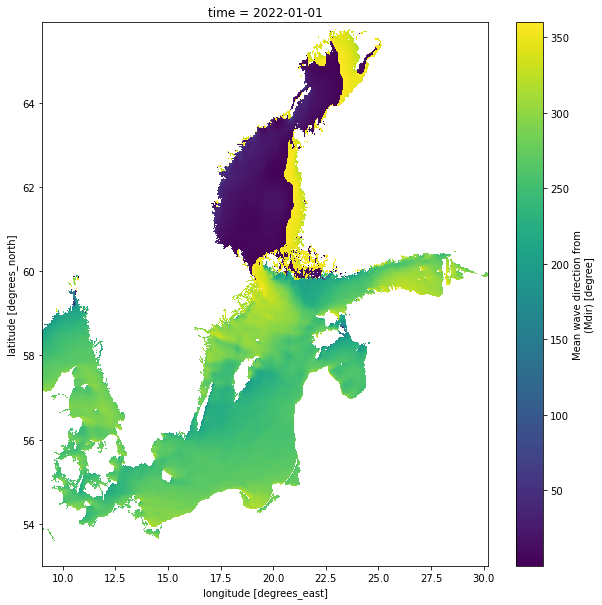

In [13]:
ds.VMDR[0].plot(figsize=(10, 10))

### Open a dataset with cube params

In [14]:
cmems_store.get_open_data_params_schema('dataset-bal-analysis-forecast-wav-hourly','dataset:zarr:cmems')

In [15]:
cmems_store.get_data_types_for_data('dataset-bal-analysis-forecast-wav-hourly')

('dataset',)

In [16]:
ds = cmems_store.open_data('dataset-bal-analysis-forecast-wav-hourly','dataset:zarr:cmems',variable_names=['VMDR'],time_range=('2022-01-01','2022-01-05'),
                            bbox=[9, 53, 20, 62])
ds

<xarray.Dataset>
Dimensions:  (time: 120, lat: 540, lon: 396)
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 61.94 61.96 61.97 61.99
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 19.9 19.93 19.96 19.99
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-01-05T23:00:00
Data variables:
    VMDR     (time, lat, lon) float32 dask.array<chunksize=(1, 481, 396), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

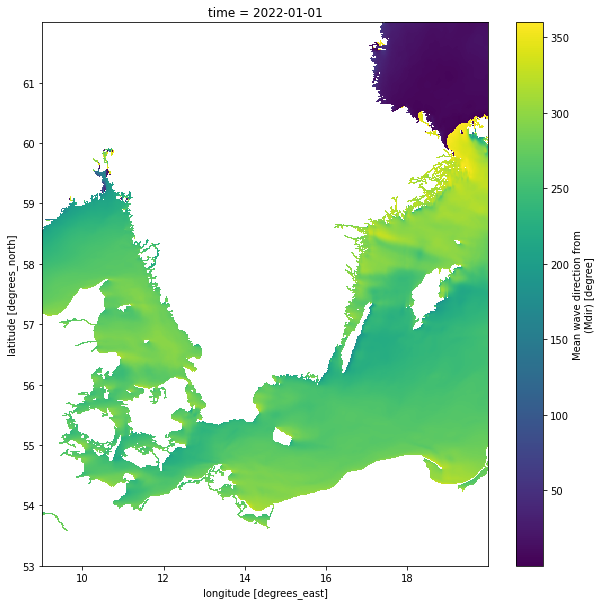

In [17]:
ds.VMDR[0].plot(figsize=(10, 10))